# Covered Call Strategy Using GBM

Import the packages, functions, and parameters we need for this question.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%pip install tabulate
from tabulate import tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Adapted from Octave's financial toolkit
from scipy.stats import norm
import numpy as np
    
def blsprice(Price, Strike, Rate, Time, Volatility):
    sigma_sqrtT = Volatility * np.sqrt (Time)

    d1 = 1 / sigma_sqrtT * (np.log(Price / Strike) + (Rate + Volatility**2 / 2) * Time)
    d2 = d1 - sigma_sqrtT

    phi1 = norm.cdf(d1)
    phi2 = norm.cdf(d2)
    disc = np.exp (-Rate * Time)
    F    = Price * np.exp ((Rate) * Time)

    Call = disc * (F * phi1 - Strike * phi2)
    Put  = disc * (Strike * (1 - phi2) + F * (phi1 - 1))
    return Call, Put

In [3]:
sigma = 0.35    # Volatility
r = 0.07        # Risk-free rate
T = 1.5         # Time to expiry
S0 = 100        # Initial asset price
S_init = 100    # Initial investment
mu = 0.09       # Real world drift
N_sim = 80000   # Number of simulations

Write the covered call strategy function under the assumption of GBM.

In [4]:
def Covered_Call(K):
    # K is the strike price

    S = S_init*np.ones(N_sim)
    phi = np.random.normal(0, 1, N_sim)
    # Stock price at time T
    ST = S*np.exp((mu - (sigma**2/2))*T + sigma*phi*math.sqrt(T))

    # Payoff for the call option
    Payoff = np.maximum(ST - K, 0)

    # Call option price at time 0
    C = blsprice(S0, K, r, T, sigma)[0]
    # Call option price at time T (value in the risk-free account)
    B = C*np.exp(r*T)

    # Final value at time T
    V = ST + B - Payoff
    
    # Investment performance (log return)
    R = np.log(V/S_init)
    R_mean = np.mean(R)
    R_std = np.std(R)
    R_VAR = np.quantile(R, 0.05)
    R_cVAR = R[R<=R_VAR].mean()

    return R, R_mean, R_std, R_VAR, R_cVAR

Generate a table showing mean, standard deviation, $95\%$ $VAR$, and $95\%$ $cVAR$ corresponding to each of the three strike values $K$ of the call.

In [5]:
# Strike prices
K1 = 101
K2 = 115
K3 = 130

# Investment Performances
R1 = Covered_Call(K1)
R2 = Covered_Call(K2)
R3 = Covered_Call(K3)

# Data for the table
K = [K1, K2, K3]
mean = [R1[1], R2[1], R3[1]]
std = [R1[2], R2[2], R3[2]]
VAR = [R1[3], R2[3], R3[3]]
cVAR = [R1[4], R2[4], R3[4]]

# Table for F, M, mean, std, VAR, and cVAR
table = {"Strike Price": K,
         "Mean": mean,
         "Standard Deviation": std,
         "95% VAR": VAR,
         "95% cVAR": cVAR}
print(tabulate(table, headers="keys", tablefmt="grid"))

+----------------+-----------+----------------------+-----------+------------+
|   Strike Price |      Mean |   Standard Deviation |   95% VAR |   95% cVAR |
+================+===========+======================+===========+============+
|            101 | 0.100261  |             0.177812 | -0.28631  |  -0.401497 |
+----------------+-----------+----------------------+-----------+------------+
|            115 | 0.0939309 |             0.230095 | -0.375178 |  -0.503287 |
+----------------+-----------+----------------------+-----------+------------+
|            130 | 0.0876373 |             0.276532 | -0.444778 |  -0.585174 |
+----------------+-----------+----------------------+-----------+------------+


Generate a plot of the (approximate) probability density function of the log return for the largest strike price.

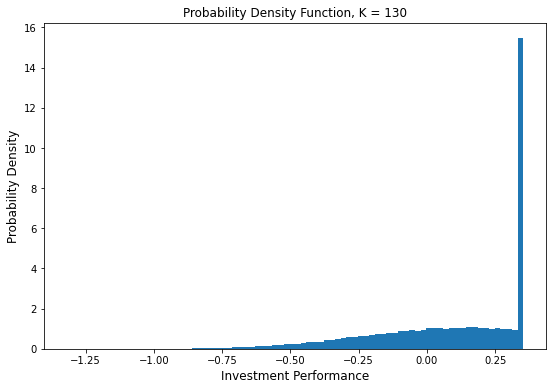

In [6]:
# Plot of probability function
plt.rcParams['figure.figsize'] = [9, 6]
plt.hist(R3[0], bins = 80, density = True)
plt.title("Probability Density Function, K = 130", fontsize = 12)
plt.xlabel("Investment Performance", fontsize = 12)
plt.ylabel("Probability Density", fontsize = 12)
plt.show()

Observation:

> According to the table, as $K$ increases, the mean of the log return decreases, the standard devation of the log return increases, the $95\%$ $VAR$ of the log return decreases, and the $95\%$ $cVAR$ of the log return decreases.

> According to the plot, the probability density function for $K=130$ is heavily left-skewed.

